Legend:

**ID - Name - Description**

0 - **VWTI** - Variance of Wavelet Transformed Image;

1 - **SWTI** - Skewness of Wavelet Transform Image;

2 - **KWTI** - Kurtosis Wavelet Transform Image;

3 - **EI** - Entropy of Image;

4 - **Class** - Class.

P.S. I'll use markdowns to explain my thoughts

# 1. Importing packages

In [1]:
## Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pk
import os

import seaborn as sns
from sklearn.model_selection import train_test_split  # holdout
from sklearn.model_selection import KFold  # validação cruzada
from sklearn.model_selection import GridSearchCV  # grid search
from sklearn.model_selection import RepeatedStratifiedKFold  # repeated cross validation
from sklearn.metrics import accuracy_score  # acurácia
from sklearn.tree import DecisionTreeClassifier  # árvore de classificação
from sklearn.neighbors import KNeighborsClassifier  # knn
from sklearn.naive_bayes import GaussianNB  # naive bayes
from sklearn.svm import SVC  # svm
from IPython.display import display

from mydatasetpackage import MyDataset
from mydatasetpackage import MyResults
from mydatasetpackage import MyPredictions
from mydatasetpackage import grid_plot
from mydatasetpackage import tic, return_toc
from mydatasetpackage import append_value


# 2. Loading dataset

In [2]:
## Filename and path
dataset_path = os.getcwd()
filename = 'data_banknote_authentication.txt'

## Loading dataset
dataset = MyDataset(dataset_path, filename)
dataset.load_txt()

data_banknote_authentication.txt dataset was loaded!
(1372, 5)


In [3]:
## Change header
header = ['VWTI', 'SWTI', 'KWTI', 'EI', 'Class']
dataset.change_header(header, flag_return_data=True).head()

,VWTI,SWTI,KWTI,EI,Class
0,3.62160,8.6661,-2.8073,-0.44699,0.0
1,4.54590,8.1674,-2.4586,-1.46210,0.0
2,3.86600,-2.6383,1.9242,0.10645,0.0
3,3.45660,9.5228,-4.0112,-3.59440,0.0
4,0.32924,-4.4552,4.5718,-0.98880,0.0


In [4]:
dataset.get_data().describe()

,VWTI,SWTI,KWTI,EI,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


## 2.1 Analysis and Preprocessing

In [5]:
dataset.check_nan()

Number of NaN values
            VWTI  SWTI  KWTI  EI  Class
NaN Values     0     0     0   0      0


In [6]:
dataset.check_null()

Number of Null values
             VWTI  SWTI  KWTI  EI  Class
Null Values     0     0     0   0      0


Original dataset separated in Input Data and Target

In [7]:
## Get original data
data = dataset.get_data()

## Separating data and class
class_column = 4
X, y = dataset.separate_data_and_target(class_column)

Input data: (1372, 4) - Output class: (1372,)


Standardize

In [8]:
standardized_data = dataset.standardize(flag_update_data=True)
standardized_data.describe()

,VWTI,SWTI,KWTI,EI
count,1.372000e+03,1.372000e+03,1.372000e+03,1.372000e+03
mean,8.286213e-17,-2.900174e-16,-3.314485e-16,-3.767637e-16
std,1.000365e+00,1.000365e+00,1.000365e+00,1.000365e+00
min,-2.630737e+00,-2.675252e+00,-1.551303e+00,-3.502703e+00
25%,-7.765474e-01,-6.188189e-01,-6.899455e-01,-5.817379e-01
50%,2.197423e-02,6.771828e-02,-1.812706e-01,2.880644e-01
75%,8.402427e-01,8.338757e-01,4.135174e-01,7.553713e-01
max,2.249008e+00,1.879908e+00,3.836586e+00,1.733680e+00


Since, no NaN and Null were found in the dataset.

I'll remove the outliers to compare the classification methods performance without these values

                          VWTI      SWTI       KWTI         EI
1st Quartile         -0.776547 -0.618819  -0.689946  -0.581738
Median                0.021974  0.067718  -0.181271   0.288064
3rd Quartile          0.840243  0.833876   0.413517   0.755371
Under Lower Bound     0.000000  0.000000   0.000000  33.000000
Above Upper Bound     0.000000  0.000000  59.000000   0.000000
Total Outliers (abs)  0.000000  0.000000  59.000000  33.000000
Total Outliers (%)    0.000000  0.000000   0.043003   0.024052


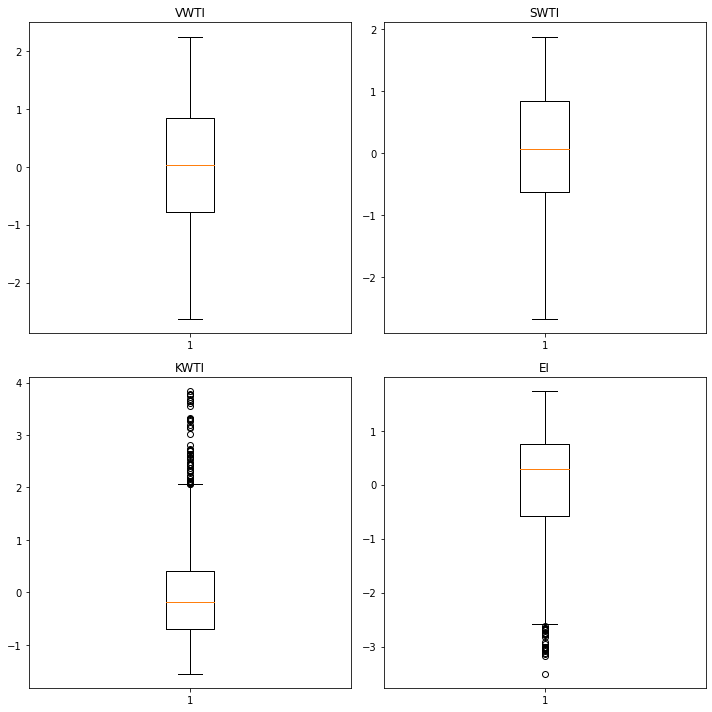

In [9]:
dataset.check_outliers(flag_plots=True)

In [10]:
no_outliers_standardized_data, no_outliers_y = dataset.remove_outliers()

Dataset without outliers shape: (1280, 4)
Reduced from  (1372, 4)  to  (1280, 4) [- 0.067 %]


Normalize

In [11]:
## Getting back to the non standardized data
dataset.data_update(data)

# Separating data and class
class_column = 4
_, _ = dataset.separate_data_and_target(class_column)

Input data: (1372, 4) - Output class: (1372,)


In [12]:
normalized_data = dataset.normalize(flag_update_data=True)
normalized_data.describe()

,VWTI,SWTI,KWTI,EI
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.539114,0.587301,0.287924,0.668917
std,0.205003,0.219611,0.185669,0.191041
min,0.000000,0.000000,0.000000,0.000000
25%,0.379977,0.451451,0.159869,0.557821
50%,0.543617,0.602168,0.254280,0.723929
75%,0.711304,0.770363,0.364674,0.813171
max,1.000000,1.000000,1.000000,1.000000


In [13]:
no_outliers_normalized_data, _ = dataset.remove_outliers()

Dataset without outliers shape: (1280, 4)
Reduced from  (1372, 4)  to  (1280, 4) [- 0.067 %]


## 2.2 Visualization

Basically, now we have:

1. standardized_data;

2. no_outliers_standardized_data;

3. normalized_data;

4. no_outliers_normalized_data;

5. y - the target vector

We want to visualize the first four in relation to the fifth, but the standardized and normalized data keep the same distribution in the features space (they are just rescaled)

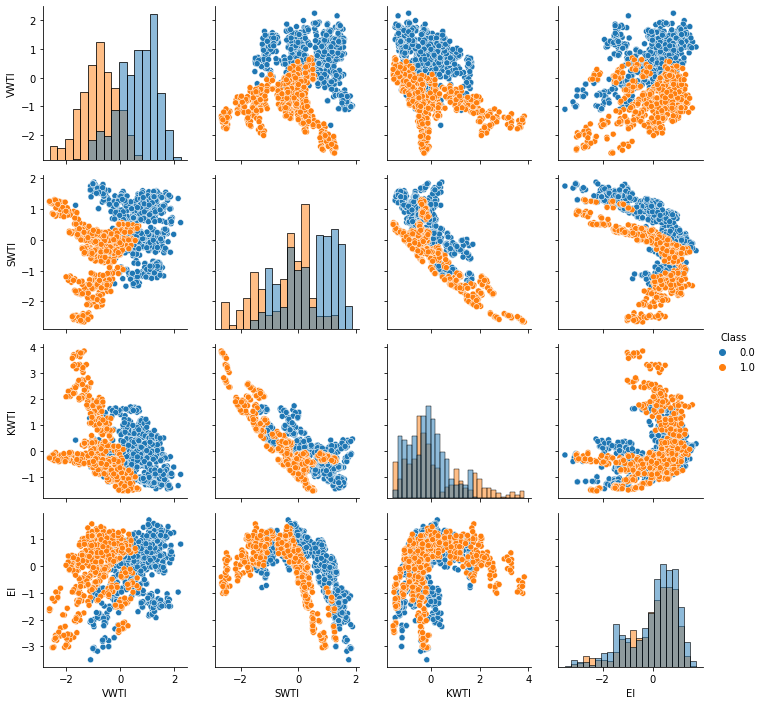

In [14]:
grid_plot(standardized_data.assign(Class = y), 'Class')

Looking to the histograms, it seems that VWTI has a better defined frequency distribution according to the labels, in SWTI these regions are more overlapping, in KWTI the distribution of class 0 (blue) seems to be contained in class 1 (orange ) and in EI the distributions are practically equal.

Following: without outliers

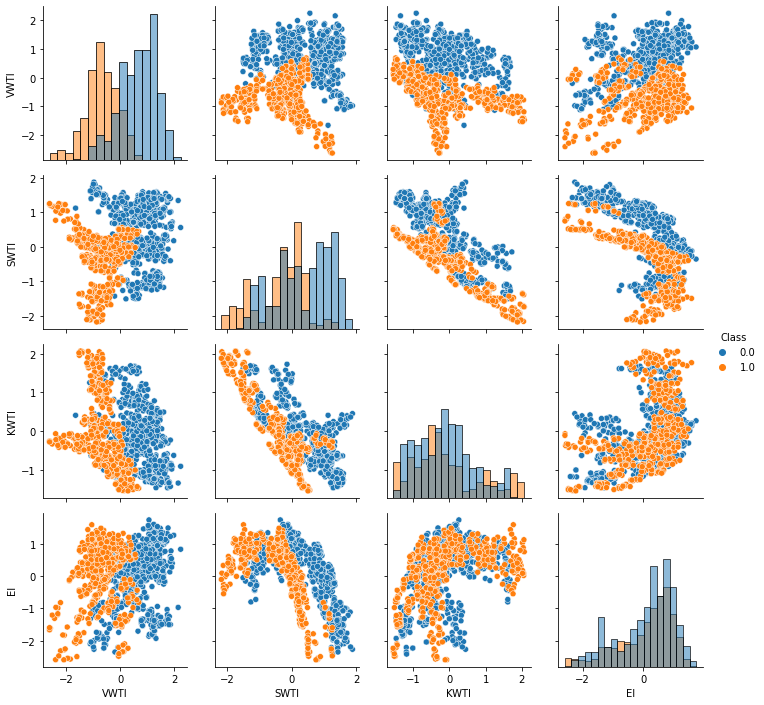

In [15]:
grid_plot(no_outliers_standardized_data.assign(Class = y), 'Class')

When the outliers were removed the KWTI started to present very similar frequency distributions between the classes.

# 3. Classification

Setting some parameters for classification

In [16]:
## Setting the result's folder path
results_path = 'D:\\Pedro\\Documentos\\Cursos\\ES\\results'

## Holdout percentage and rng()
test_size = 0.30
seed = 42  # RNG

In [17]:
## List with all datasets
all_datasets = [standardized_data, normalized_data, \
    no_outliers_standardized_data, no_outliers_normalized_data]

all_datasets_names = ['Standardized Data', 'Normalized Data', \
    'Standardized Data (No Outliers)', 'Normalized Data (No Outliers)']

all_targets = [y, y, no_outliers_y, no_outliers_y]

number_of_datasets = len(all_datasets)
print('Number of datasets:', number_of_datasets)

Number of datasets: 4


In [18]:
grid_of_parameters = []
grid_of_parameters.append([{ \
    'n_neighbors':[3,5,7,9,11], \
    'weights': ['uniform', 'distance'], \
    'metric': ['minkowski', 'manhattan'], \
}])

grid_of_parameters.append([{ \
    'criterion': ['gini', 'entropy'], \
    # 'splitter': ['best', 'random'], \
    'min_samples_leaf': [2,3,4,5], \
    'max_depth': [2,3,4,5,7,10,15,20], \
}])

grid_of_parameters.append([{ \
    'var_smoothing': [1e-9], \
}])

grid_of_parameters.append([{
    'kernel': ["linear", "poly", "rbf", "sigmoid"], \
    'C': np.linspace(0.01,1.5,5), \
    'degree': [2,3]
    
}])

In [19]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC()))

models_names = [name[0] for name in models]

number_of_models = len(models)
print('Number of models:', number_of_models)

Number of models: 4


In [20]:
## Evaluation metric
scoring = 'accuracy'

## Cross-validation folds number
folds_number = 10
kfolds = KFold(n_splits = folds_number)
number_of_repetitions = 5

## Setting results dicts
settings_id = 0
results_dict = {}
results_dict_saving_name = os.path.join(results_path, 'Results.pk')
predictions_dict = {}
predictions_dict_saving_name = os.path.join(results_path, 'Prediction.pk')


for current_model in range(number_of_models):
    print('Grid Search for', models_names[current_model])
    tic()
    for current_dataset in range(number_of_datasets):
        settings_id += 1
        X = all_datasets[current_dataset]
        y_label = all_targets[current_dataset]
        current_dataset_name = all_datasets_names[current_dataset]
        # Holdout
        X_train, X_test, y_train, y_test = train_test_split(
            X, y_label, test_size = test_size, random_state = seed, stratify = y_label
                )
        # Repeated stratified kfold
        repeated_stratified_kfold = RepeatedStratifiedKFold(n_splits=folds_number, \
            n_repeats=number_of_repetitions, random_state=seed)
        # Getting model and parameters
        model = models[current_model][1]
        parameters = grid_of_parameters[current_model]
        grid_search = GridSearchCV(
            model, verbose=0, scoring=scoring, param_grid=parameters, \
            n_jobs=None, cv=repeated_stratified_kfold \
        )
        results = grid_search.fit(X_train, y_train)
        predictions = grid_search.predict(X_test)

        append_value(results_dict, 'ID', settings_id)
        append_value(results_dict, 'Model', models_names[current_model])
        append_value(results_dict, 'Dataset', current_dataset_name)
        append_value(results_dict, 'Evaluation_Metric', scoring)
        append_value(results_dict, 'CVResults', grid_search.cv_results_)
        append_value(results_dict, 'Test Metric', accuracy_score(y_test, predictions))

        append_value(predictions_dict, 'ID', settings_id)
        append_value(predictions_dict, 'Model', models_names[current_model])
        append_value(predictions_dict, 'Dataset', current_dataset_name)
        append_value(predictions_dict, 'Best_Parameters', grid_search.best_params_)
        append_value(predictions_dict, 'Real_Label', y_test)
        append_value(predictions_dict, 'Predicted_Label', predictions)
    print('Demanded time:', return_toc())

with open(results_dict_saving_name, "wb") as fname:
    pk.dump(results_dict, fname)

with open(predictions_dict_saving_name, "wb") as fname:
    pk.dump(predictions_dict, fname)

Grid Search for KNN
Demanded time: 18.010957956314087
Grid Search for DTC
Demanded time: 46.84110355377197
Grid Search for GNB
Demanded time: 0.5651285648345947
Grid Search for SVC
Demanded time: 63.67302846908569


# 4. Result analysis

Loading results

In [2]:
results_path = os.path.join(os.getcwd(),'results')
results_filename = 'Results.pk'
prediction_filename = 'Prediction.pk'

loaded_results = MyResults(results_path, results_filename)
loaded_results.load()

Generating a dataframe with the results

In [22]:
results_dataframe =  loaded_results.results_dataframe()
display(results_dataframe)

,ID,dataset,model,parameters,mean_cv_score,std_cv_score
0,2,Normalized Data,KNN,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei...",0.997083,0.004677
1,2,Normalized Data,KNN,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei...",0.997083,0.004677
2,2,Normalized Data,KNN,"{'metric': 'minkowski', 'n_neighbors': 5, 'wei...",0.997917,0.004167
3,2,Normalized Data,KNN,"{'metric': 'minkowski', 'n_neighbors': 5, 'wei...",0.997917,0.004167
4,2,Normalized Data,KNN,"{'metric': 'minkowski', 'n_neighbors': 7, 'wei...",0.997917,0.004167
...,...,...,...,...,...,...
495,15,Standardized Data (No Outliers),SVC,"{'C': 1.5, 'degree': 2, 'kernel': 'sigmoid'}",0.843975,0.034939
496,15,Standardized Data (No Outliers),SVC,"{'C': 1.5, 'degree': 3, 'kernel': 'linear'}",0.987723,0.010033
497,15,Standardized Data (No Outliers),SVC,"{'C': 1.5, 'degree': 3, 'kernel': 'poly'}",0.993523,0.008087
498,15,Standardized Data (No Outliers),SVC,"{'C': 1.5, 'degree': 3, 'kernel': 'rbf'}",1.000000,0.000000


Best results for all datasets and models

In [23]:
loaded_results.general_best_results()

The best results considering cross-validation mean score for             all conditions searched


,ID,dataset,model,parameters,mean_cv_score,std_cv_score
98,14,Normalized Data,SVC,"{'C': 0.3825, 'degree': 3, 'kernel': 'poly'}",1.0,0.0
106,14,Normalized Data,SVC,"{'C': 0.755, 'degree': 3, 'kernel': 'poly'}",1.0,0.0
114,14,Normalized Data,SVC,"{'C': 1.1275, 'degree': 3, 'kernel': 'poly'}",1.0,0.0
118,14,Normalized Data,SVC,"{'C': 1.5, 'degree': 2, 'kernel': 'poly'}",1.0,0.0
122,14,Normalized Data,SVC,"{'C': 1.5, 'degree': 3, 'kernel': 'poly'}",1.0,0.0
223,16,Normalized Data (No Outliers),SVC,"{'C': 0.3825, 'degree': 3, 'kernel': 'poly'}",1.0,0.0
231,16,Normalized Data (No Outliers),SVC,"{'C': 0.755, 'degree': 3, 'kernel': 'poly'}",1.0,0.0
239,16,Normalized Data (No Outliers),SVC,"{'C': 1.1275, 'degree': 3, 'kernel': 'poly'}",1.0,0.0
243,16,Normalized Data (No Outliers),SVC,"{'C': 1.5, 'degree': 2, 'kernel': 'poly'}",1.0,0.0
247,16,Normalized Data (No Outliers),SVC,"{'C': 1.5, 'degree': 3, 'kernel': 'poly'}",1.0,0.0


Best results for each dataset

In [24]:
loaded_results.datasets_best_results()

The best results considering cross-validation mean score                 for Normalized Data dataset


,ID,dataset,model,parameters,mean_cv_score,std_cv_score
98,14,Normalized Data,SVC,"{'C': 0.3825, 'degree': 3, 'kernel': 'poly'}",1.0,0.0
106,14,Normalized Data,SVC,"{'C': 0.755, 'degree': 3, 'kernel': 'poly'}",1.0,0.0
114,14,Normalized Data,SVC,"{'C': 1.1275, 'degree': 3, 'kernel': 'poly'}",1.0,0.0
118,14,Normalized Data,SVC,"{'C': 1.5, 'degree': 2, 'kernel': 'poly'}",1.0,0.0
122,14,Normalized Data,SVC,"{'C': 1.5, 'degree': 3, 'kernel': 'poly'}",1.0,0.0


The best results considering cross-validation mean score                 for Normalized Data (No Outliers) dataset


,ID,dataset,model,parameters,mean_cv_score,std_cv_score
223,16,Normalized Data (No Outliers),SVC,"{'C': 0.3825, 'degree': 3, 'kernel': 'poly'}",1.0,0.0
231,16,Normalized Data (No Outliers),SVC,"{'C': 0.755, 'degree': 3, 'kernel': 'poly'}",1.0,0.0
239,16,Normalized Data (No Outliers),SVC,"{'C': 1.1275, 'degree': 3, 'kernel': 'poly'}",1.0,0.0
243,16,Normalized Data (No Outliers),SVC,"{'C': 1.5, 'degree': 2, 'kernel': 'poly'}",1.0,0.0
247,16,Normalized Data (No Outliers),SVC,"{'C': 1.5, 'degree': 3, 'kernel': 'poly'}",1.0,0.0


The best results considering cross-validation mean score                 for Standardized Data dataset


,ID,dataset,model,parameters,mean_cv_score,std_cv_score
369,13,Standardized Data,SVC,"{'C': 1.5, 'degree': 2, 'kernel': 'rbf'}",1.0,0.0
373,13,Standardized Data,SVC,"{'C': 1.5, 'degree': 3, 'kernel': 'rbf'}",1.0,0.0


The best results considering cross-validation mean score                 for Standardized Data (No Outliers) dataset


,ID,dataset,model,parameters,mean_cv_score,std_cv_score
486,15,Standardized Data (No Outliers),SVC,"{'C': 1.1275, 'degree': 2, 'kernel': 'rbf'}",1.0,0.0
490,15,Standardized Data (No Outliers),SVC,"{'C': 1.1275, 'degree': 3, 'kernel': 'rbf'}",1.0,0.0
494,15,Standardized Data (No Outliers),SVC,"{'C': 1.5, 'degree': 2, 'kernel': 'rbf'}",1.0,0.0
498,15,Standardized Data (No Outliers),SVC,"{'C': 1.5, 'degree': 3, 'kernel': 'rbf'}",1.0,0.0


Comparing the datasets, we can see that a dataset with no outliers does not always yield the best results. Even having searched for models with the same hyperparameters values in the grid search, sometimes the dataset without outliers fit models with lower mean repeated stratified cross validation accuracy or with a higher standard deviation (e.g. decision tree models for both normalized and standardized datasets)

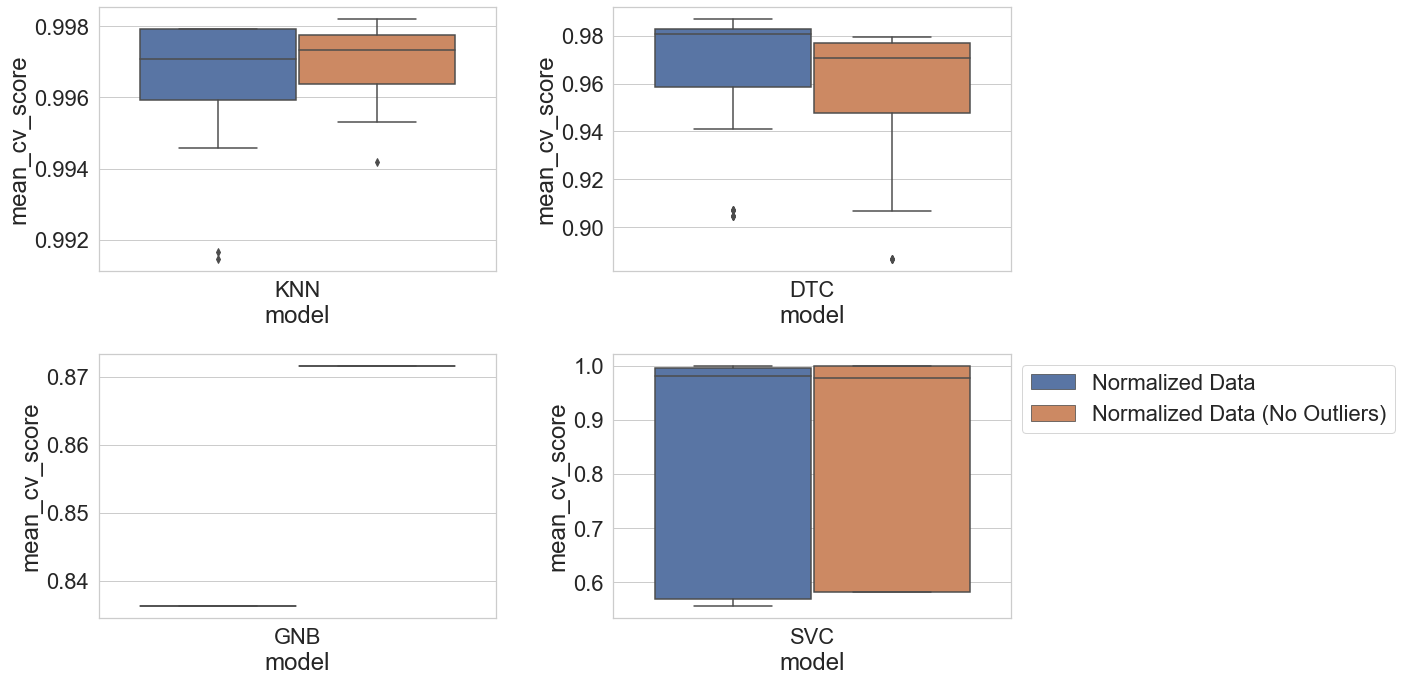

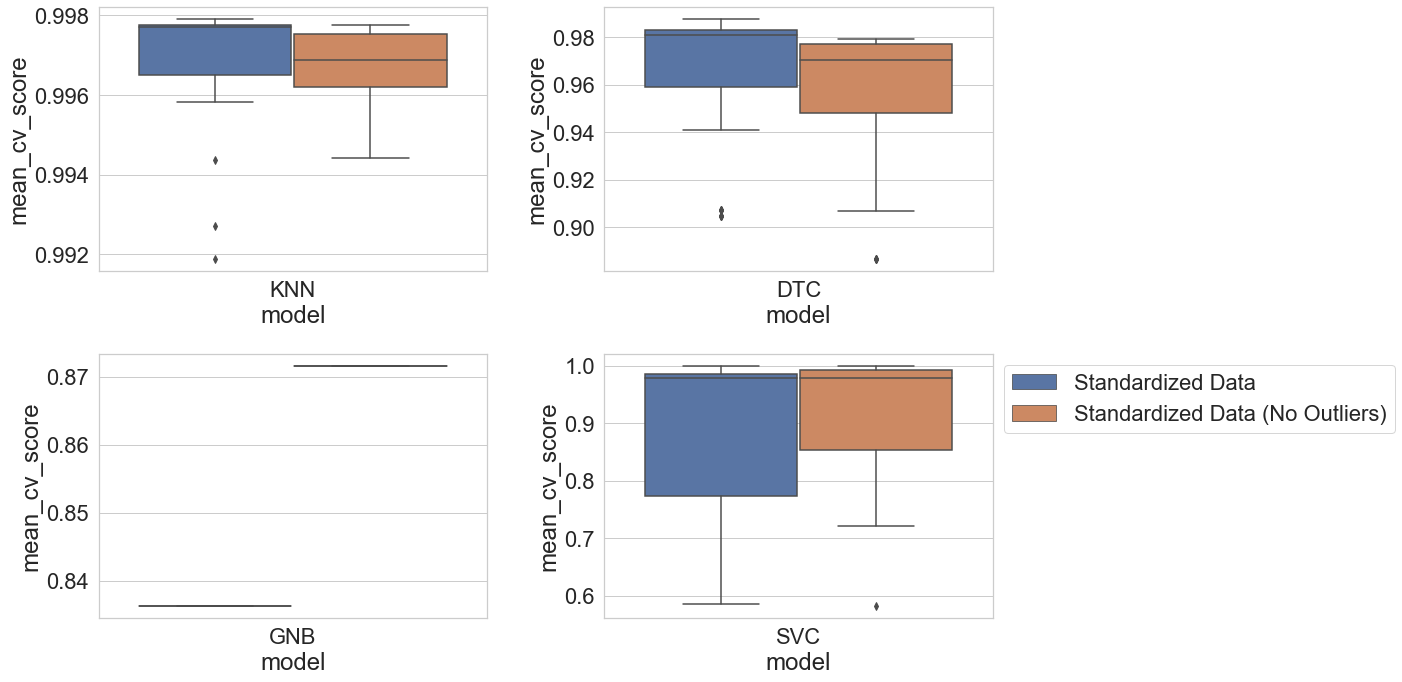

In [25]:
loaded_results.datasets_comparison()

The comparison of mean 'mean_cv_score' values is no applicable, since each model have a particular number of hiperparameters searched in the grid search. But, from the previous visualization we can affirm that Support Vector Machine Classifier (SVC) was the only model that yield maximum accuracy considering the 'mean_cv_score' (mean repeated stratified cross validation accuracy). However, the SVC model showed the highest standard deviation.

In [3]:
loaded_predictions = MyPredictions(results_path, prediction_filename)
loaded_predictions.load()

Now, I'll plot the confusion matrix obtained when considering the models that best performed in the cross-validation step, but for the test portion of each dataset.

Dataset: Normalized Data
Model: SVC
Model's parameters:


,C,degree,kernel
Values,0.3825,3,poly


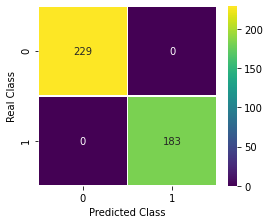

In [4]:
loaded_predictions.confusion_matrix_for_id(14)

Dataset: Normalized Data (No Outliers)
Model: SVC
Model's parameters:


,C,degree,kernel
Values,0.3825,3,poly


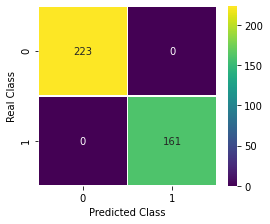

In [5]:
loaded_predictions.confusion_matrix_for_id(16)

Dataset: Standardized Data
Model: SVC
Model's parameters:


,C,degree,kernel
Values,1.5,2,rbf


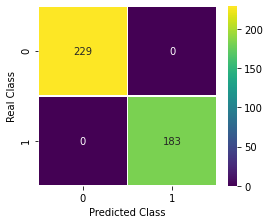

In [6]:
loaded_predictions.confusion_matrix_for_id(13)

Dataset: Standardized Data (No Outliers)
Model: SVC
Model's parameters:


,C,degree,kernel
Values,1.1275,2,rbf


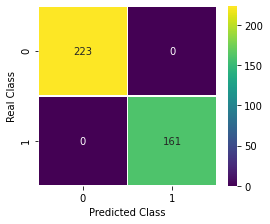

In [7]:
loaded_predictions.confusion_matrix_for_id(15)

For curiosity reasons: all the results achieved by the grid search approach

In [ ]:
loaded_results.display_results()

,ID,Dataset,Model,metric,n_neighbors,weights,Mean_CV_Score,Std_CV_Score
0,2,Normalized Data,KNN,minkowski,3,uniform,0.997083,0.004677
1,2,Normalized Data,KNN,minkowski,3,distance,0.997083,0.004677
2,2,Normalized Data,KNN,minkowski,5,uniform,0.997917,0.004167
3,2,Normalized Data,KNN,minkowski,5,distance,0.997917,0.004167
4,2,Normalized Data,KNN,minkowski,7,uniform,0.997917,0.004167
5,2,Normalized Data,KNN,minkowski,7,distance,0.997917,0.004167
6,2,Normalized Data,KNN,minkowski,9,uniform,0.995417,0.008375
7,2,Normalized Data,KNN,minkowski,9,distance,0.997917,0.004167
8,2,Normalized Data,KNN,minkowski,11,uniform,0.991667,0.009081
9,2,Normalized Data,KNN,minkowski,11,distance,0.997917,0.004167


,ID,Dataset,Model,criterion,max_depth,min_samples_leaf,Mean_CV_Score,Std_CV_Score
0,6,Normalized Data,DTC,gini,2,2,0.907292,0.031749
1,6,Normalized Data,DTC,gini,2,3,0.907292,0.031749
2,6,Normalized Data,DTC,gini,2,4,0.907292,0.031749
3,6,Normalized Data,DTC,gini,2,5,0.907292,0.031749
4,6,Normalized Data,DTC,gini,3,2,0.940833,0.024601
...,...,...,...,...,...,...,...,...
59,6,Normalized Data,DTC,entropy,15,5,0.986458,0.014014
60,6,Normalized Data,DTC,entropy,20,2,0.987708,0.012959
61,6,Normalized Data,DTC,entropy,20,3,0.986042,0.013439
62,6,Normalized Data,DTC,entropy,20,4,0.984583,0.014167


,ID,Dataset,Model,var_smoothing,Mean_CV_Score,Std_CV_Score
0,10,Normalized Data,GNB,1.000000e-09,0.83625,0.030904


,ID,Dataset,Model,C,degree,kernel,Mean_CV_Score,Std_CV_Score
0,14,Normalized Data,SVC,0.0100,2,linear,0.572500,0.011961
1,14,Normalized Data,SVC,0.0100,2,poly,0.975417,0.016372
2,14,Normalized Data,SVC,0.0100,2,rbf,0.902083,0.028260
3,14,Normalized Data,SVC,0.0100,2,sigmoid,0.555208,0.004774
4,14,Normalized Data,SVC,0.0100,3,linear,0.572500,0.011961
5,14,Normalized Data,SVC,0.0100,3,poly,0.985000,0.011055
6,14,Normalized Data,SVC,0.0100,3,rbf,0.902083,0.028260
7,14,Normalized Data,SVC,0.0100,3,sigmoid,0.555208,0.004774
8,14,Normalized Data,SVC,0.3825,2,linear,0.978333,0.016776
9,14,Normalized Data,SVC,0.3825,2,poly,0.991875,0.010054


,ID,Dataset,Model,metric,n_neighbors,weights,Mean_CV_Score,Std_CV_Score
0,4,Normalized Data (No Outliers),KNN,minkowski,3,uniform,0.996649,0.006025
1,4,Normalized Data (No Outliers),KNN,minkowski,3,distance,0.996649,0.006025
2,4,Normalized Data (No Outliers),KNN,minkowski,5,uniform,0.997768,0.004465
3,4,Normalized Data (No Outliers),KNN,minkowski,5,distance,0.997768,0.004465
4,4,Normalized Data (No Outliers),KNN,minkowski,7,uniform,0.997096,0.005390
5,4,Normalized Data (No Outliers),KNN,minkowski,7,distance,0.997543,0.005143
6,4,Normalized Data (No Outliers),KNN,minkowski,9,uniform,0.995318,0.009976
7,4,Normalized Data (No Outliers),KNN,minkowski,9,distance,0.997096,0.005830
8,4,Normalized Data (No Outliers),KNN,minkowski,11,uniform,0.994195,0.011654
9,4,Normalized Data (No Outliers),KNN,minkowski,11,distance,0.997765,0.004470


,ID,Dataset,Model,criterion,max_depth,min_samples_leaf,Mean_CV_Score,Std_CV_Score
0,8,Normalized Data (No Outliers),DTC,gini,2,2,0.906929,0.027429
1,8,Normalized Data (No Outliers),DTC,gini,2,3,0.906929,0.027429
2,8,Normalized Data (No Outliers),DTC,gini,2,4,0.906929,0.027429
3,8,Normalized Data (No Outliers),DTC,gini,2,5,0.906929,0.027429
4,8,Normalized Data (No Outliers),DTC,gini,3,2,0.927673,0.025297
...,...,...,...,...,...,...,...,...
59,8,Normalized Data (No Outliers),DTC,entropy,15,5,0.976789,0.017842
60,8,Normalized Data (No Outliers),DTC,entropy,20,2,0.977233,0.016403
61,8,Normalized Data (No Outliers),DTC,entropy,20,3,0.977014,0.017205
62,8,Normalized Data (No Outliers),DTC,entropy,20,4,0.975218,0.017637


,ID,Dataset,Model,var_smoothing,Mean_CV_Score,Std_CV_Score
0,12,Normalized Data (No Outliers),GNB,1.000000e-09,0.871623,0.037037


,ID,Dataset,Model,C,degree,kernel,Mean_CV_Score,Std_CV_Score
0,16,Normalized Data (No Outliers),SVC,0.0100,2,linear,0.581486,0.003931
1,16,Normalized Data (No Outliers),SVC,0.0100,2,poly,0.973201,0.016449
2,16,Normalized Data (No Outliers),SVC,0.0100,2,rbf,0.868310,0.025347
3,16,Normalized Data (No Outliers),SVC,0.0100,2,sigmoid,0.581486,0.003931
4,16,Normalized Data (No Outliers),SVC,0.0100,3,linear,0.581486,0.003931
5,16,Normalized Data (No Outliers),SVC,0.0100,3,poly,0.983258,0.012072
6,16,Normalized Data (No Outliers),SVC,0.0100,3,rbf,0.868310,0.025347
7,16,Normalized Data (No Outliers),SVC,0.0100,3,sigmoid,0.581486,0.003931
8,16,Normalized Data (No Outliers),SVC,0.3825,2,linear,0.975668,0.014761
9,16,Normalized Data (No Outliers),SVC,0.3825,2,poly,0.996427,0.007563


,ID,Dataset,Model,metric,n_neighbors,weights,Mean_CV_Score,Std_CV_Score
0,1,Standardized Data,KNN,minkowski,3,uniform,0.997708,0.004315
1,1,Standardized Data,KNN,minkowski,3,distance,0.997708,0.004315
2,1,Standardized Data,KNN,minkowski,5,uniform,0.997708,0.004315
3,1,Standardized Data,KNN,minkowski,5,distance,0.997708,0.004315
4,1,Standardized Data,KNN,minkowski,7,uniform,0.997917,0.004167
5,1,Standardized Data,KNN,minkowski,7,distance,0.997917,0.004167
6,1,Standardized Data,KNN,minkowski,9,uniform,0.996042,0.007764
7,1,Standardized Data,KNN,minkowski,9,distance,0.997917,0.004167
8,1,Standardized Data,KNN,minkowski,11,uniform,0.992708,0.008900
9,1,Standardized Data,KNN,minkowski,11,distance,0.997917,0.004167


,ID,Dataset,Model,criterion,max_depth,min_samples_leaf,Mean_CV_Score,Std_CV_Score
0,5,Standardized Data,DTC,gini,2,2,0.907292,0.031749
1,5,Standardized Data,DTC,gini,2,3,0.907292,0.031749
2,5,Standardized Data,DTC,gini,2,4,0.907292,0.031749
3,5,Standardized Data,DTC,gini,2,5,0.907292,0.031749
4,5,Standardized Data,DTC,gini,3,2,0.940833,0.024601
...,...,...,...,...,...,...,...,...
59,5,Standardized Data,DTC,entropy,15,5,0.985833,0.014548
60,5,Standardized Data,DTC,entropy,20,2,0.986667,0.012679
61,5,Standardized Data,DTC,entropy,20,3,0.985833,0.013463
62,5,Standardized Data,DTC,entropy,20,4,0.985208,0.013833


,ID,Dataset,Model,var_smoothing,Mean_CV_Score,Std_CV_Score
0,9,Standardized Data,GNB,1.000000e-09,0.83625,0.030904


,ID,Dataset,Model,C,degree,kernel,Mean_CV_Score,Std_CV_Score
0,13,Standardized Data,SVC,0.0100,2,linear,0.976875,0.017342
1,13,Standardized Data,SVC,0.0100,2,poly,0.585625,0.016310
2,13,Standardized Data,SVC,0.0100,2,rbf,0.910417,0.027639
3,13,Standardized Data,SVC,0.0100,2,sigmoid,0.905417,0.026667
4,13,Standardized Data,SVC,0.0100,3,linear,0.976875,0.017342
5,13,Standardized Data,SVC,0.0100,3,poly,0.701250,0.027516
6,13,Standardized Data,SVC,0.0100,3,rbf,0.910417,0.027639
7,13,Standardized Data,SVC,0.0100,3,sigmoid,0.905417,0.026667
8,13,Standardized Data,SVC,0.3825,2,linear,0.985625,0.011765
9,13,Standardized Data,SVC,0.3825,2,poly,0.670833,0.036144


,ID,Dataset,Model,metric,n_neighbors,weights,Mean_CV_Score,Std_CV_Score
0,3,Standardized Data (No Outliers),KNN,minkowski,3,uniform,0.996649,0.006025
1,3,Standardized Data (No Outliers),KNN,minkowski,3,distance,0.996649,0.006025
2,3,Standardized Data (No Outliers),KNN,minkowski,5,uniform,0.996874,0.005494
3,3,Standardized Data (No Outliers),KNN,minkowski,5,distance,0.996874,0.005494
4,3,Standardized Data (No Outliers),KNN,minkowski,7,uniform,0.997321,0.004768
5,3,Standardized Data (No Outliers),KNN,minkowski,7,distance,0.997768,0.004465
6,3,Standardized Data (No Outliers),KNN,minkowski,9,uniform,0.996207,0.006148
7,3,Standardized Data (No Outliers),KNN,minkowski,9,distance,0.997543,0.004626
8,3,Standardized Data (No Outliers),KNN,minkowski,11,uniform,0.994422,0.010024
9,3,Standardized Data (No Outliers),KNN,minkowski,11,distance,0.997546,0.004622


,ID,Dataset,Model,criterion,max_depth,min_samples_leaf,Mean_CV_Score,Std_CV_Score
0,7,Standardized Data (No Outliers),DTC,gini,2,2,0.906929,0.027429
1,7,Standardized Data (No Outliers),DTC,gini,2,3,0.906929,0.027429
2,7,Standardized Data (No Outliers),DTC,gini,2,4,0.906929,0.027429
3,7,Standardized Data (No Outliers),DTC,gini,2,5,0.906929,0.027429
4,7,Standardized Data (No Outliers),DTC,gini,3,2,0.927673,0.025297
...,...,...,...,...,...,...,...,...
59,7,Standardized Data (No Outliers),DTC,entropy,15,5,0.976564,0.017760
60,7,Standardized Data (No Outliers),DTC,entropy,20,2,0.977011,0.017219
61,7,Standardized Data (No Outliers),DTC,entropy,20,3,0.976567,0.016887
62,7,Standardized Data (No Outliers),DTC,entropy,20,4,0.975670,0.017539


,ID,Dataset,Model,var_smoothing,Mean_CV_Score,Std_CV_Score
0,11,Standardized Data (No Outliers),GNB,1.000000e-09,0.871623,0.037037


,ID,Dataset,Model,C,degree,kernel,Mean_CV_Score,Std_CV_Score
0,15,Standardized Data (No Outliers),SVC,0.0100,2,linear,0.975448,0.014108
1,15,Standardized Data (No Outliers),SVC,0.0100,2,poly,0.581486,0.003931
2,15,Standardized Data (No Outliers),SVC,0.0100,2,rbf,0.874547,0.025271
3,15,Standardized Data (No Outliers),SVC,0.0100,2,sigmoid,0.926330,0.028179
4,15,Standardized Data (No Outliers),SVC,0.0100,3,linear,0.975448,0.014108
5,15,Standardized Data (No Outliers),SVC,0.0100,3,poly,0.725718,0.033722
6,15,Standardized Data (No Outliers),SVC,0.0100,3,rbf,0.874547,0.025271
7,15,Standardized Data (No Outliers),SVC,0.0100,3,sigmoid,0.926330,0.028179
8,15,Standardized Data (No Outliers),SVC,0.3825,2,linear,0.983258,0.012072
9,15,Standardized Data (No Outliers),SVC,0.3825,2,poly,0.720287,0.035944
